# 1. Import lib

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

# to desplay arabic char in gragh without any problem 
import arabic_reshaper
from bidi.algorithm import get_display

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Read data

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79975 entries, 0 to 79974
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   creation_datetime          79975 non-null  object 
 1   updated_at                 79975 non-null  object 
 2   age_less_than              79975 non-null  int64  
 3   num_apartments             79975 non-null  int64  
 4   num_bedrooms               79975 non-null  int64  
 5   floor_num                  79975 non-null  int64  
 6   num_kitchens               79975 non-null  int64  
 7   closed                     79975 non-null  object 
 8   commercial_or_residential  79975 non-null  object 
 9   property_type              79975 non-null  object 
 10  driver_room                79975 non-null  object 
 11  duplex                     79975 non-null  object 
 12  family_or_single           79975 non-null  object 
 13  furnished                  79975 non-null  obj

# 3. Question to make EDA

## 3.1  Most of the real estate directed to whom?

In [4]:
data["family_or_single"].value_counts()

عزاب      63394
عوائل     16578
#NAME?        3
Name: family_or_single, dtype: int64

as we see above are problem so we will ignore it right now to make graph without confused value 

In [5]:
family_or_single = data[data["family_or_single"] != "#NAME?" ]

In [6]:
family_or_single["family_or_single"].value_counts()

عزاب     63394
عوائل    16578
Name: family_or_single, dtype: int64

In [7]:
family_or_single["family_or_single"] = family_or_single["family_or_single"].replace("عزاب", get_display(arabic_reshaper.reshape("عزاب")))
family_or_single["family_or_single"] = family_or_single["family_or_single"].replace("عوائل", get_display(arabic_reshaper.reshape("عوائل")))


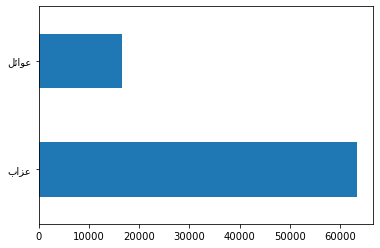

In [8]:
family_or_single["family_or_single"].value_counts().plot(kind="barh")
plt.savefig('family_or_single.png', dpi=300, bbox_inches='tight')

## 3.2 Does most of the real estate have maid rooms?

In [9]:
data[data["property_type"] != "أرض"]["maid_room"].value_counts()

لا يوجد غرفة خادمة    43998
غرفة خادمة            19104
Name: maid_room, dtype: int64

i ignore (أرض) becuase i know you can not determine that land has maid room or not before you build the real estate 

In [10]:
data["maid_room"] = data["maid_room"].replace("لا يوجد غرفة خادمة", get_display(arabic_reshaper.reshape("لا يوجد غرفة خادمة")))
data["maid_room"] = data["maid_room"].replace("غرفة خادمة", get_display(arabic_reshaper.reshape("غرفة خادمة")))

<AxesSubplot:>

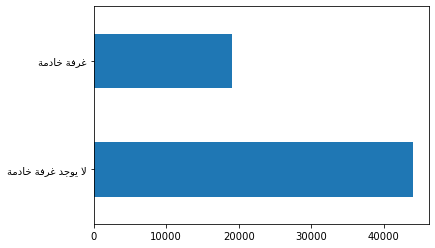

In [11]:
data[data["property_type"] != "أرض"]["maid_room"].value_counts().plot(kind="barh")
#plt.savefig('maid_room.png', dpi=300,bbox_inches='tight')

## 3.3 Do most of the real estate have swimming pools?

In [12]:
data["pool"] = data["pool"].replace("لا يوجد مسبح", get_display(arabic_reshaper.reshape("لا يوجد مسبح")))
data["pool"] = data["pool"].replace("مسبح", get_display(arabic_reshaper.reshape("مسبح")))


<AxesSubplot:>

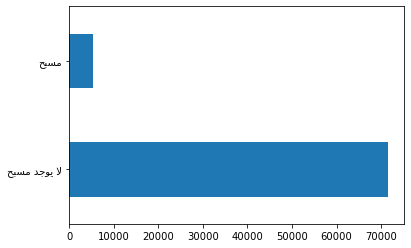

In [13]:
property_type_list = ["مكتب تجاري","غرفة","مستودع","محل","مخيم"]
data[~data["property_type"].isin(property_type_list)]["pool"].value_counts().plot(kind="barh")
#plt.savefig('pool.png', dpi=300,bbox_inches='tight')

## 3.4 Most of the real estate is offered by whom?

In [14]:
data["advertiser_type"].value_counts()

مسوق    62787
مالك    17188
Name: advertiser_type, dtype: int64

In [15]:
data["advertiser_type"] = data["advertiser_type"].replace("مسوق", get_display(arabic_reshaper.reshape("مسوق")))
data["advertiser_type"] = data["advertiser_type"].replace("مالك", get_display(arabic_reshaper.reshape("مالك")))

<AxesSubplot:>

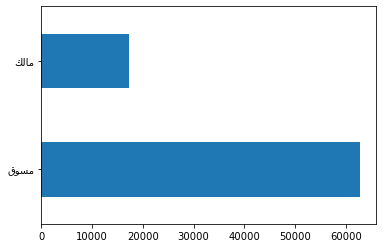

In [16]:
data["advertiser_type"].value_counts().plot(kind="barh")
#plt.savefig('advertiser_type.png', dpi=300,bbox_inches='tight')

## 3.5 How much is real estate offered per rental period?

In [17]:
data["rent_period"].value_counts()

غير محدد    56226
سنوي        19505
يومي         3113
شهري         1098
5              16
4              14
6               3
Name: rent_period, dtype: int64

we see problem above so we ignore it in the graph 

In [18]:
rent_period_list = ["شهري","يومي","سنوي","غير محدد"]
rent_period_data= data[data["rent_period"].isin(rent_period_list) ]

In [19]:
rent_period_data["rent_period"].value_counts()

غير محدد    56226
سنوي        19505
يومي         3113
شهري         1098
Name: rent_period, dtype: int64

In [20]:
rent_period_data["rent_period"] = rent_period_data["rent_period"].replace("غير محدد", get_display(arabic_reshaper.reshape("غير محدد")))
rent_period_data["rent_period"] = rent_period_data["rent_period"].replace("سنوي", get_display(arabic_reshaper.reshape("سنوي")))
rent_period_data["rent_period"] = rent_period_data["rent_period"].replace("يومي", get_display(arabic_reshaper.reshape("يومي")))
rent_period_data["rent_period"] = rent_period_data["rent_period"].replace("شهري", get_display(arabic_reshaper.reshape("شهري")))



<AxesSubplot:>

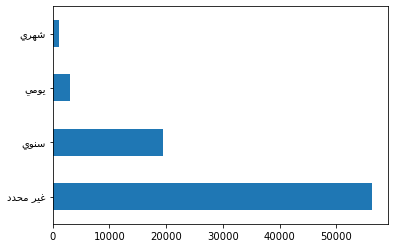

In [21]:
rent_period_data["rent_period"].value_counts().plot(kind="barh")
#plt.savefig('rent_period.png', dpi=300,bbox_inches='tight')

## 3.6 How many real estate have been closed for each rental period ?

In [22]:
data_Close = data[data["closed"] == "مغلق"]

In [23]:
data_Close["rent_period"].value_counts()

غير محدد    39144
سنوي        16673
يومي         2677
شهري          872
5              16
4              14
6               3
Name: rent_period, dtype: int64

In [24]:
rent_period_list = ["شهري","يومي","سنوي","غير محدد"]
rent_period_data= data_Close[data_Close["rent_period"].isin(rent_period_list) ]

In [25]:
rent_period_data["rent_period"] = rent_period_data["rent_period"].replace("غير محدد", get_display(arabic_reshaper.reshape("غير محدد")))
rent_period_data["rent_period"] = rent_period_data["rent_period"].replace("سنوي", get_display(arabic_reshaper.reshape("سنوي")))
rent_period_data["rent_period"] = rent_period_data["rent_period"].replace("يومي", get_display(arabic_reshaper.reshape("يومي")))
rent_period_data["rent_period"] = rent_period_data["rent_period"].replace("شهري", get_display(arabic_reshaper.reshape("شهري")))



<AxesSubplot:>

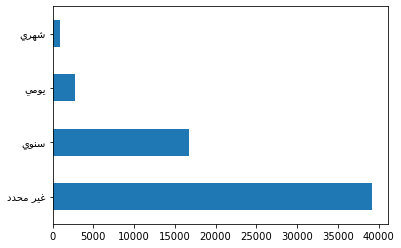

In [26]:
rent_period_data["rent_period"].value_counts().plot(kind="barh")
#plt.savefig('rent_period_close.png', dpi=300,bbox_inches='tight')

In [27]:
data =pd.read_csv("train.csv")
data_Close = data[data["closed"] == "مغلق"]
rent_period_list = ["شهري","يومي","سنوي","غير محدد"]
rent_period_data= data_Close[data_Close["rent_period"].isin(rent_period_list) ]

In [28]:
rent_period_close_value_count = rent_period_data["rent_period"].value_counts()
values = rent_period_data["rent_period"].value_counts().keys().tolist()
counts = rent_period_data["rent_period"].value_counts().tolist()
rent_period_close_value_count = rent_period_data["rent_period"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
rent_period_close_value_count


غير محدد    65.9%
سنوي        28.1%
يومي         4.5%
شهري         1.5%
Name: rent_period, dtype: object

## 3.7  Is most of the real estate for sale?

In [29]:
data =pd.read_csv("train.csv")
data_Close = data[data["closed"] == "مغلق"]


In [30]:
data["for_rent_or_sale"] = data["for_rent_or_sale"].replace("للبيع", get_display(arabic_reshaper.reshape("للبيع")))
data["for_rent_or_sale"] = data["for_rent_or_sale"].replace("للإيجار", get_display(arabic_reshaper.reshape("للإيجار")))


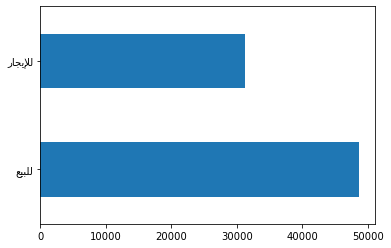

In [31]:
data["for_rent_or_sale"].value_counts().plot(kind="barh")
plt.savefig('for_rent_or_sale.png', dpi=300,bbox_inches='tight')

## 3.8 The number of the real estate that was close and to whom it was directed ? 

In [32]:
data =pd.read_csv("train.csv")
data_Close = data[data["closed"] == "مغلق"]
family_or_single = data_Close[data_Close["family_or_single"] != "#NAME?" ]


In [33]:
data_Close["family_or_single"].value_counts()

عزاب      45566
عوائل     13830
#NAME?        3
Name: family_or_single, dtype: int64

In [34]:
family_or_single["family_or_single"].value_counts()

عزاب     45566
عوائل    13830
Name: family_or_single, dtype: int64

In [35]:
family_or_single["family_or_single"] = family_or_single["family_or_single"].replace("عزاب", get_display(arabic_reshaper.reshape("عزاب")))
family_or_single["family_or_single"] = family_or_single["family_or_single"].replace("عوائل", get_display(arabic_reshaper.reshape("عوائل")))



<AxesSubplot:>

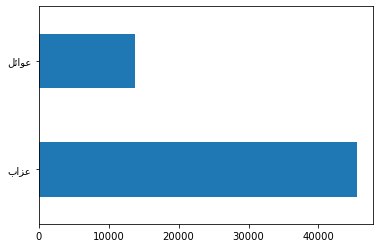

In [36]:
family_or_single["family_or_single"].value_counts().plot(kind="barh")
#plt.savefig('family_or_single_close.png', dpi=300, bbox_inches='tight')

## 3.9 The number of real estate in each year

In [37]:
data["creation_datetime"] = pd.to_datetime(data["creation_datetime"])
data["year_of_creation"] = data["creation_datetime"].dt.year


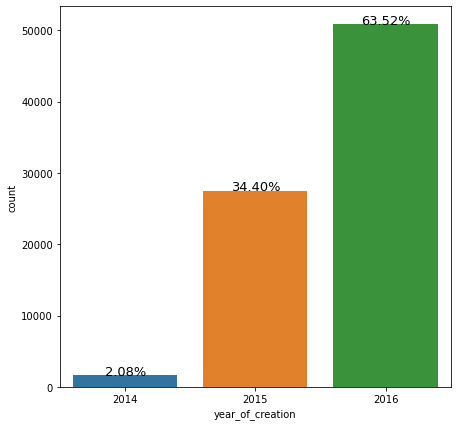

In [38]:
plt.figure(figsize=(7,7))
s = sns.countplot(x=data["year_of_creation"], data=data,dodge=True)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data)*100),
            ha="center", fontsize=13)
plt.savefig('year_of_creation.png', dpi=300, bbox_inches='tight')

## 3.10 Percentage of real estate types in each year 

### 3.10.1 2014 

In [39]:
data_2014 = data[data["year_of_creation"] == 2014]


In [40]:
data_2014["property_type"].value_counts()

فيلا          596
أرض           496
شقة           258
عمارة         127
استراحة        57
دور            54
محل            34
بيت            20
مكتب تجاري     12
مزرعة           7
Name: property_type, dtype: int64

In [41]:
data_2014["property_type"] = data_2014["property_type"].replace("فيلا", get_display(arabic_reshaper.reshape("فيلا")))
data_2014["property_type"] = data_2014["property_type"].replace("أرض", get_display(arabic_reshaper.reshape("أرض")))
data_2014["property_type"] = data_2014["property_type"].replace("شقة", get_display(arabic_reshaper.reshape("شقة")))
data_2014["property_type"] = data_2014["property_type"].replace("عمارة", get_display(arabic_reshaper.reshape("عمارة")))
data_2014["property_type"] = data_2014["property_type"].replace("استراحة", get_display(arabic_reshaper.reshape("استراحة")))
data_2014["property_type"] = data_2014["property_type"].replace("دور", get_display(arabic_reshaper.reshape("دور")))
data_2014["property_type"] = data_2014["property_type"].replace("محل", get_display(arabic_reshaper.reshape("محل")))
data_2014["property_type"] = data_2014["property_type"].replace("بيت", get_display(arabic_reshaper.reshape("بيت")))
data_2014["property_type"] = data_2014["property_type"].replace("مكتب تجاري", get_display(arabic_reshaper.reshape("مكتب تجاري")))
data_2014["property_type"] = data_2014["property_type"].replace("مزرعة", get_display(arabic_reshaper.reshape("مزرعة")))



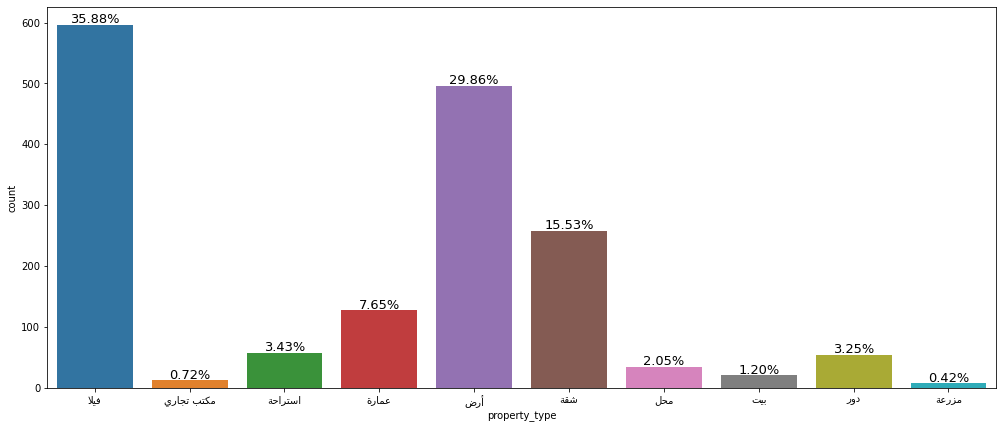

In [42]:
plt.figure(figsize=(17,7))
s = sns.countplot(x=data_2014["property_type"], data=data_2014,dodge=True)
sizes=[]
for p in s.patches:
    plt.title("")
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data_2014)*100),
            ha="center", fontsize=13)
#plt.savefig('property_type_14.png', dpi=300, bbox_inches='tight')

### 3.10.2 2015

In [43]:
data_2015 = data[data["year_of_creation"] == 2015]

In [44]:
data_2015["property_type"].value_counts()

فيلا          9685
أرض           6599
شقة           5685
عمارة         1881
دور           1280
استراحة        962
محل            745
بيت            286
مكتب تجاري     210
مزرعة           84
مستودع          70
مخيم            23
قصر              2
Name: property_type, dtype: int64

In [45]:
data_2015["property_type"] = data_2015["property_type"].replace("فيلا", get_display(arabic_reshaper.reshape("فيلا")))
data_2015["property_type"] = data_2015["property_type"].replace("أرض", get_display(arabic_reshaper.reshape("أرض")))
data_2015["property_type"] = data_2015["property_type"].replace("شقة", get_display(arabic_reshaper.reshape("شقة")))
data_2015["property_type"] = data_2015["property_type"].replace("عمارة", get_display(arabic_reshaper.reshape("عمارة")))
data_2015["property_type"] = data_2015["property_type"].replace("استراحة", get_display(arabic_reshaper.reshape("استراحة")))
data_2015["property_type"] = data_2015["property_type"].replace("دور", get_display(arabic_reshaper.reshape("دور")))
data_2015["property_type"] = data_2015["property_type"].replace("محل", get_display(arabic_reshaper.reshape("محل")))
data_2015["property_type"] = data_2015["property_type"].replace("بيت", get_display(arabic_reshaper.reshape("بيت")))
data_2015["property_type"] = data_2015["property_type"].replace("مكتب تجاري", get_display(arabic_reshaper.reshape("مكتب تجاري")))
data_2015["property_type"] = data_2015["property_type"].replace("مزرعة", get_display(arabic_reshaper.reshape("مزرعة")))
data_2015["property_type"] = data_2015["property_type"].replace("مستودع", get_display(arabic_reshaper.reshape("مستودع")))
data_2015["property_type"] = data_2015["property_type"].replace("مخيم", get_display(arabic_reshaper.reshape("مخيم")))
data_2015["property_type"] = data_2015["property_type"].replace("قصر", get_display(arabic_reshaper.reshape("قصر")))



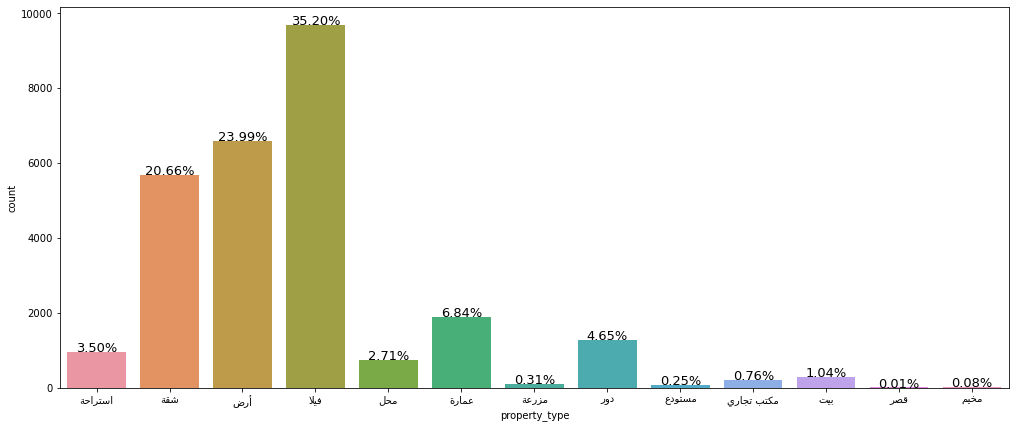

In [46]:
plt.figure(figsize=(17,7))
s = sns.countplot(x=data_2015["property_type"], data=data_2015,dodge=True)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data_2015)*100),
            ha="center", fontsize=13)
plt.savefig('property_type_15.png', dpi=300, bbox_inches='tight')

### 3.10.3 2016

In [47]:
data_2016 = data[data["year_of_creation"] == 2016]

In [48]:
data_2016["property_type"].value_counts()

فيلا          17064
شقة           13786
أرض            9778
عمارة          3014
دور            2869
استراحة        1749
محل            1278
مكتب تجاري      433
بيت             418
مستودع          231
مزرعة           148
مخيم             32
غرفة              2
Name: property_type, dtype: int64

In [49]:
data_2016["property_type"] = data_2016["property_type"].replace("فيلا", get_display(arabic_reshaper.reshape("فيلا")))
data_2016["property_type"] = data_2016["property_type"].replace("أرض", get_display(arabic_reshaper.reshape("أرض")))
data_2016["property_type"] = data_2016["property_type"].replace("شقة", get_display(arabic_reshaper.reshape("شقة")))
data_2016["property_type"] = data_2016["property_type"].replace("عمارة", get_display(arabic_reshaper.reshape("عمارة")))
data_2016["property_type"] = data_2016["property_type"].replace("استراحة", get_display(arabic_reshaper.reshape("استراحة")))
data_2016["property_type"] = data_2016["property_type"].replace("دور", get_display(arabic_reshaper.reshape("دور")))
data_2016["property_type"] = data_2016["property_type"].replace("محل", get_display(arabic_reshaper.reshape("محل")))
data_2016["property_type"] = data_2016["property_type"].replace("بيت", get_display(arabic_reshaper.reshape("بيت")))
data_2016["property_type"] = data_2016["property_type"].replace("مكتب تجاري", get_display(arabic_reshaper.reshape("مكتب تجاري")))
data_2016["property_type"] = data_2016["property_type"].replace("مزرعة", get_display(arabic_reshaper.reshape("مزرعة")))
data_2016["property_type"] = data_2016["property_type"].replace("مستودع", get_display(arabic_reshaper.reshape("مستودع")))
data_2016["property_type"] = data_2016["property_type"].replace("مخيم", get_display(arabic_reshaper.reshape("مخيم")))
data_2016["property_type"] = data_2016["property_type"].replace("غرفة", get_display(arabic_reshaper.reshape("غرفة")))



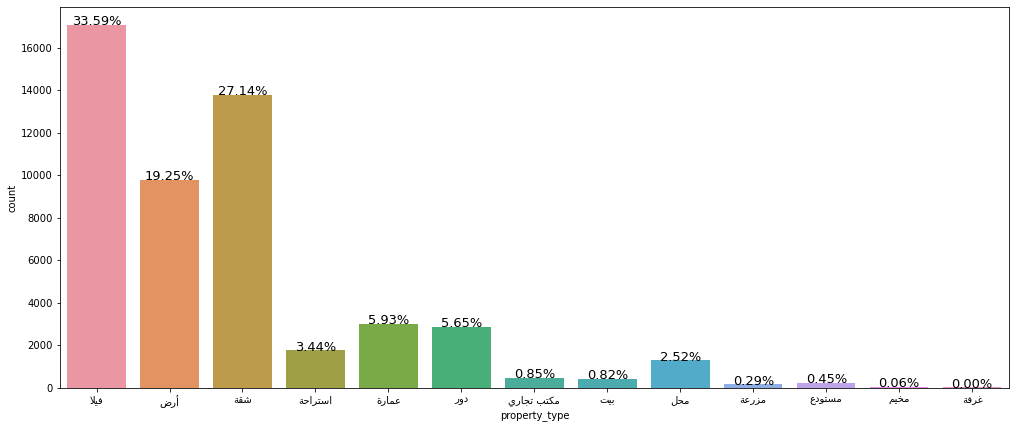

In [50]:
plt.figure(figsize=(17,7))
s = sns.countplot(x=data_2016["property_type"], data=data_2016,dodge=True)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data_2016)*100),
            ha="center", fontsize=13)
#plt.savefig('property_type_16.png', dpi=300, bbox_inches='tight')

## 3.11 Percentage of types of real estate sold in each year 

### 3.11.1 2014

In [51]:
data_Close = data[data["closed"] == "مغلق"]


In [52]:
data_2014 = data_Close[data_Close["year_of_creation"] == 2014]


In [53]:
data_2014["property_type"].value_counts()


فيلا          589
أرض           459
شقة           253
عمارة         119
استراحة        54
دور            54
محل            34
بيت            18
مكتب تجاري     12
مزرعة           6
Name: property_type, dtype: int64

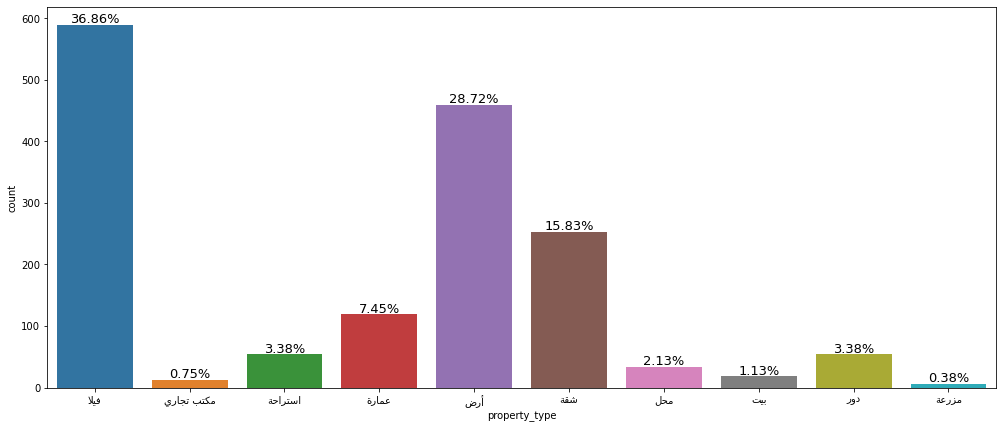

In [54]:


data_2014["property_type"] = data_2014["property_type"].replace("فيلا", get_display(arabic_reshaper.reshape("فيلا")))
data_2014["property_type"] = data_2014["property_type"].replace("أرض", get_display(arabic_reshaper.reshape("أرض")))
data_2014["property_type"] = data_2014["property_type"].replace("شقة", get_display(arabic_reshaper.reshape("شقة")))
data_2014["property_type"] = data_2014["property_type"].replace("عمارة", get_display(arabic_reshaper.reshape("عمارة")))
data_2014["property_type"] = data_2014["property_type"].replace("استراحة", get_display(arabic_reshaper.reshape("استراحة")))
data_2014["property_type"] = data_2014["property_type"].replace("دور", get_display(arabic_reshaper.reshape("دور")))
data_2014["property_type"] = data_2014["property_type"].replace("محل", get_display(arabic_reshaper.reshape("محل")))
data_2014["property_type"] = data_2014["property_type"].replace("بيت", get_display(arabic_reshaper.reshape("بيت")))
data_2014["property_type"] = data_2014["property_type"].replace("مكتب تجاري", get_display(arabic_reshaper.reshape("مكتب تجاري")))
data_2014["property_type"] = data_2014["property_type"].replace("مزرعة", get_display(arabic_reshaper.reshape("مزرعة")))

plt.figure(figsize=(17,7))
s = sns.countplot(x=data_2014["property_type"], data=data_2014,dodge=True)
sizes=[]
for p in s.patches:
    plt.title("")
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data_2014)*100),
            ha="center", fontsize=13)
plt.savefig('property_type_14_sold.png', dpi=300, bbox_inches='tight')

### 3.11.2 2015

In [55]:
data_2015 = data_Close[data_Close["year_of_creation"] == 2015]


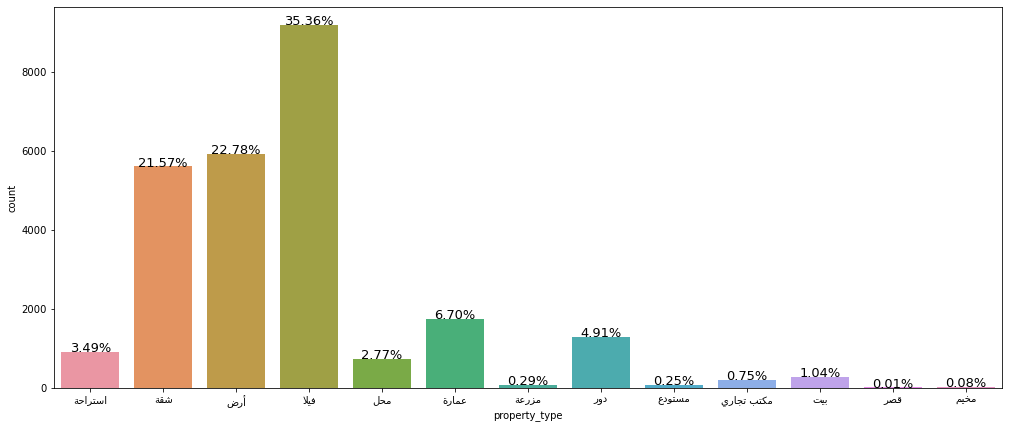

In [56]:

data_2015["property_type"] = data_2015["property_type"].replace("فيلا", get_display(arabic_reshaper.reshape("فيلا")))
data_2015["property_type"] = data_2015["property_type"].replace("أرض", get_display(arabic_reshaper.reshape("أرض")))
data_2015["property_type"] = data_2015["property_type"].replace("شقة", get_display(arabic_reshaper.reshape("شقة")))
data_2015["property_type"] = data_2015["property_type"].replace("عمارة", get_display(arabic_reshaper.reshape("عمارة")))
data_2015["property_type"] = data_2015["property_type"].replace("استراحة", get_display(arabic_reshaper.reshape("استراحة")))
data_2015["property_type"] = data_2015["property_type"].replace("دور", get_display(arabic_reshaper.reshape("دور")))
data_2015["property_type"] = data_2015["property_type"].replace("محل", get_display(arabic_reshaper.reshape("محل")))
data_2015["property_type"] = data_2015["property_type"].replace("بيت", get_display(arabic_reshaper.reshape("بيت")))
data_2015["property_type"] = data_2015["property_type"].replace("مكتب تجاري", get_display(arabic_reshaper.reshape("مكتب تجاري")))
data_2015["property_type"] = data_2015["property_type"].replace("مزرعة", get_display(arabic_reshaper.reshape("مزرعة")))
data_2015["property_type"] = data_2015["property_type"].replace("مستودع", get_display(arabic_reshaper.reshape("مستودع")))
data_2015["property_type"] = data_2015["property_type"].replace("مخيم", get_display(arabic_reshaper.reshape("مخيم")))
data_2015["property_type"] = data_2015["property_type"].replace("قصر", get_display(arabic_reshaper.reshape("قصر")))


plt.figure(figsize=(17,7))
s = sns.countplot(x=data_2015["property_type"], data=data_2015,dodge=True)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data_2015)*100),
            ha="center", fontsize=13)
#plt.savefig('property_type_15_sold.png', dpi=300, bbox_inches='tight')


### 3.11.3 2016

In [57]:
data_2016 = data_Close[data_Close["year_of_creation"] == 2016]


In [58]:
data_2016["property_type"].value_counts()


شقة           10781
فيلا           9301
أرض            5126
دور            2325
عمارة          1566
استراحة        1140
محل             830
بيت             285
مكتب تجاري      235
مستودع          118
مزرعة           116
مخيم             20
غرفة              1
Name: property_type, dtype: int64

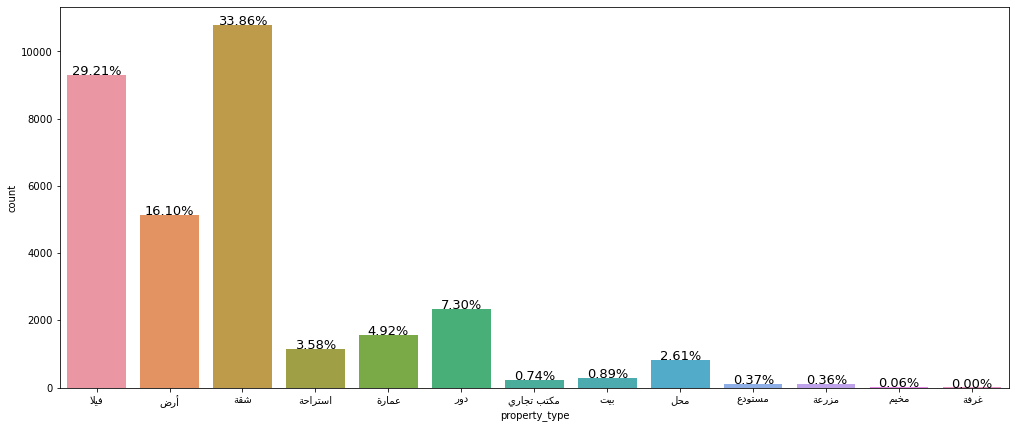

In [59]:

data_2016["property_type"] = data_2016["property_type"].replace("فيلا", get_display(arabic_reshaper.reshape("فيلا")))
data_2016["property_type"] = data_2016["property_type"].replace("أرض", get_display(arabic_reshaper.reshape("أرض")))
data_2016["property_type"] = data_2016["property_type"].replace("شقة", get_display(arabic_reshaper.reshape("شقة")))
data_2016["property_type"] = data_2016["property_type"].replace("عمارة", get_display(arabic_reshaper.reshape("عمارة")))
data_2016["property_type"] = data_2016["property_type"].replace("استراحة", get_display(arabic_reshaper.reshape("استراحة")))
data_2016["property_type"] = data_2016["property_type"].replace("دور", get_display(arabic_reshaper.reshape("دور")))
data_2016["property_type"] = data_2016["property_type"].replace("محل", get_display(arabic_reshaper.reshape("محل")))
data_2016["property_type"] = data_2016["property_type"].replace("بيت", get_display(arabic_reshaper.reshape("بيت")))
data_2016["property_type"] = data_2016["property_type"].replace("مكتب تجاري", get_display(arabic_reshaper.reshape("مكتب تجاري")))
data_2016["property_type"] = data_2016["property_type"].replace("مزرعة", get_display(arabic_reshaper.reshape("مزرعة")))
data_2016["property_type"] = data_2016["property_type"].replace("مستودع", get_display(arabic_reshaper.reshape("مستودع")))
data_2016["property_type"] = data_2016["property_type"].replace("مخيم", get_display(arabic_reshaper.reshape("مخيم")))
data_2016["property_type"] = data_2016["property_type"].replace("غرفة", get_display(arabic_reshaper.reshape("غرفة")))


plt.figure(figsize=(17,7))
s = sns.countplot(x=data_2016["property_type"], data=data_2016,dodge=True)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data_2016)*100),
            ha="center", fontsize=13)
#plt.savefig('property_type_16_sold.png', dpi=300, bbox_inches='tight')

## 3.12 Top 10 neighborhoods where the deal was closed

<AxesSubplot:>

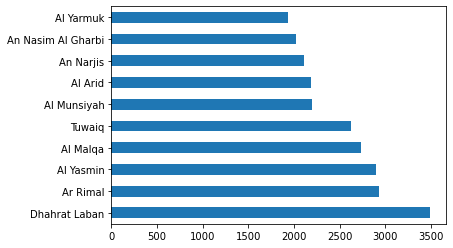

In [60]:
data_Close["district_name_en"].value_counts()[:10].plot(kind='barh')
#plt.savefig('top_district.png', dpi=300, bbox_inches='tight')

In [61]:
data_Close["district_name_en"].value_counts()[:10]

Dhahrat Laban         3491
Ar Rimal              2929
Al Yasmin             2895
Al Malqa              2735
Tuwaiq                2621
Al Munsiyah           2192
Al Arid               2182
An Narjis             2111
An Nasim Al Gharbi    2020
Al Yarmuk             1932
Name: district_name_en, dtype: int64

## 3.13 The most of the real estate sold is it furnished or not?

In [62]:
data["furnished"] = data["furnished"].replace("مؤثثة", get_display(arabic_reshaper.reshape("مؤثثة")))
data["furnished"] = data["furnished"].replace("لا يوجد اثاث", get_display(arabic_reshaper.reshape("لا يوجد اثاث")))


<AxesSubplot:>

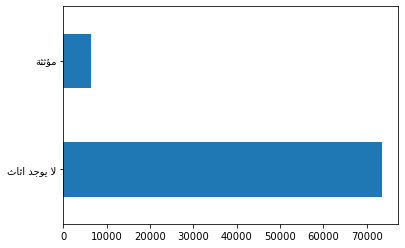

In [63]:
# the value (ارض) i think it must not be furnished but in the dataset its furnished (3 are furnished)

data["furnished"].value_counts().plot(kind="barh")
#plt.savefig('furnished.png', dpi=300, bbox_inches='tight')

## 3.14 The age of the real estate 

In [64]:
data.describe()

,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,num_living_rooms,price_per_meter,price,num_rooms,area,street_width,num_water_cycles,Latitude,Longitude,year_of_creation
count,79975.000000,79975.000000,79975.000000,79975.000000,79975.000000,79975.00000,7.997500e+04,7.997500e+04,79975.000000,7.997500e+04,79975.000000,79975.000000,79975.000000,79975.000000,79975.000000
mean,2.577243,1.059944,2.563926,0.447915,0.553398,1.07141,4.164485e+05,9.254068e+08,0.356324,4.439294e+05,16.476261,2.251929,24.746980,46.690735,2015.614455
std,5.696260,3.829860,2.022601,0.958806,0.596332,1.10410,2.937905e+07,7.348788e+10,5.843536,2.681608e+07,17.137501,1.904128,0.113882,0.107782,0.527676
min,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,24.299600,46.298200,2014.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,3.500000e+04,0.000000,1.100000e+02,0.000000,0.000000,24.661650,46.615600,2015.000000
50%,0.000000,0.000000,3.000000,0.000000,1.000000,1.00000,0.000000e+00,7.000000e+05,0.000000,3.750000e+02,15.000000,2.000000,24.781000,46.680600,2016.000000
75%,2.000000,0.000000,5.000000,1.000000,1.000000,2.00000,0.000000e+00,1.717950e+06,0.000000,6.600000e+02,20.000000,4.000000,24.822000,46.779900,2016.000000
max,36.000000,90.000000,5.000000,20.000000,5.000000,5.00000,2.147480e+09,1.000000e+13,800.000000,2.147484e+09,100.000000,5.000000,25.156200,47.319400,2016.000000


In [65]:
# i see the describe above and i decide that is no -1 must in the data set 
data = pd.read_csv("train.csv")
data =  data[data.floor_num != -1] 
data =  data[data.age_less_than != -1]
#data =  data[data.price_per_meter != 0]
#data =  data[data.price != 0]
#data =  data[data.area != 0]
#data =  data[data.street_width != 0]
# if i cleaning the data it will be only 17261 was good  ,, i put those condition becuase i think its logical

In [66]:
bin_age_less_than = pd.cut(data["age_less_than"],bins=[-1,10,20,40],labels=["less_<=10","between_10_and_20", "More_than_20"])
data["age_less_than_bin"] = bin_age_less_than
data["age_less_than_bin"] = data["age_less_than_bin"].astype(str)


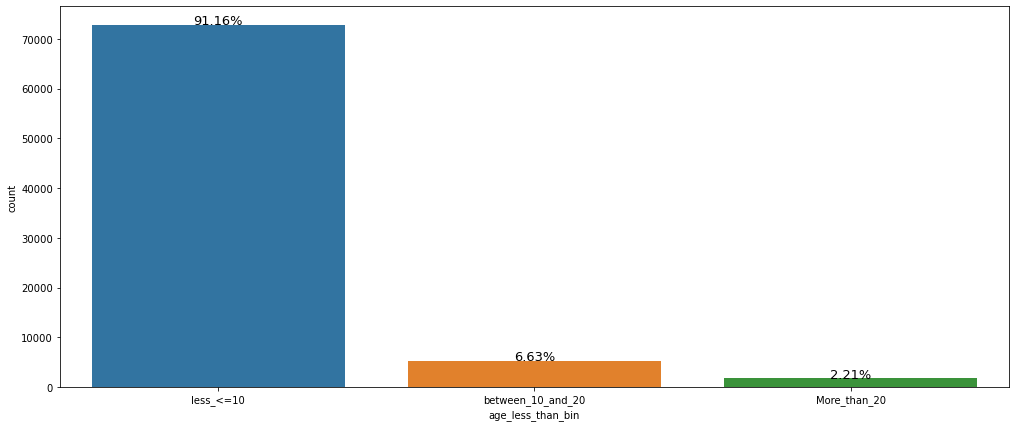

In [67]:
plt.figure(figsize=(17,7))
s = sns.countplot(x=data["age_less_than_bin"], data=data,dodge=True)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data)*100),
            ha="center", fontsize=13)
#plt.savefig('age_less_than_bin.png', dpi=300, bbox_inches='tight')

In [68]:
data["age_less_than_bin"].value_counts(dropna=False)

less_<=10            72902
between_10_and_20     5306
More_than_20          1764
Name: age_less_than_bin, dtype: int64

## 3.15 the age of the real estate that are sold  

In [69]:
data_close = data[data["closed"] == "مغلق"]

In [70]:
bin_age_less_than_sold = pd.cut(data_close["age_less_than"],bins=[-1,10,20,40],labels=["less_<=10","between_10_and_20", "More_than_20"])
data_close["age_less_than_bin_sold"] = bin_age_less_than_sold
data_close["age_less_than_bin_sold"] = data_close["age_less_than_bin_sold"].astype(str)


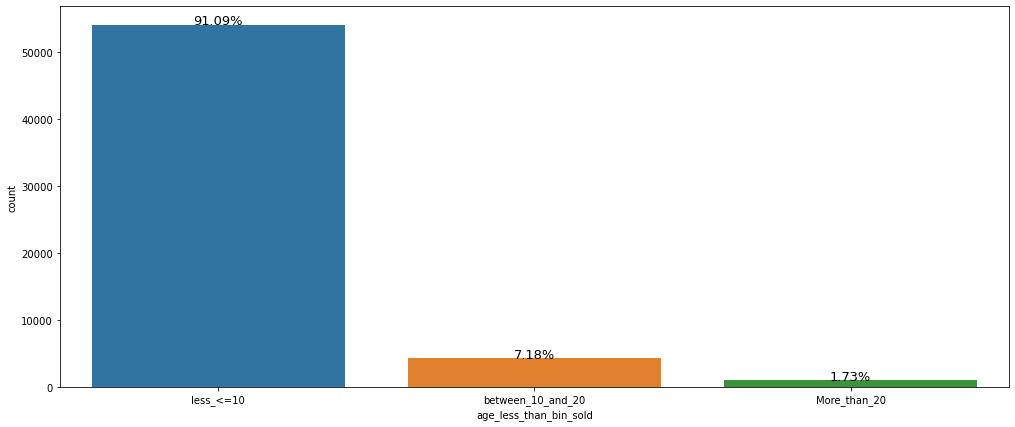

In [71]:
plt.figure(figsize=(17,7))
s = sns.countplot(x=data_close["age_less_than_bin_sold"], data=data_close,dodge=True)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data_close)*100),
            ha="center", fontsize=13)
plt.savefig('age_less_than_bin_sold.png', dpi=300, bbox_inches='tight')

## 3.17  The percentage of buying a real estate with an age of more than 10 and  the price per meter is above the average

In [72]:
# mean of the price per meter 

In [73]:
data_close["price_per_meter"].mean()

560516.4596269109

In [74]:
data_close["age_less_than_bin_sold"].value_counts()

less_<=10            54104
between_10_and_20     4266
More_than_20          1026
Name: age_less_than_bin_sold, dtype: int64

In [75]:
data_close[(data_close["age_less_than_bin_sold"].isin(["between_10_and_20","More_than_20"])) & (data_close["price_per_meter"] > 560516.4596269109) ]


,creation_datetime,updated_at,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,closed,commercial_or_residential,property_type,...,street_width,for_rent_or_sale,num_water_cycles,Latitude,Longitude,region_name_en,nearest_city_name_en,district_name_en,age_less_than_bin,age_less_than_bin_sold
57711,2016-06-10 02:58:36,2016-06-10 03:24:50,15,0,0,0,0,مغلق,غير محدد,محل,...,25,للبيع,0,24.6395,46.7179,Riyadh,LABAN,Al Futah,between_10_and_20,between_10_and_20


In [76]:
data_close.iloc[57711]

creation_datetime            2016-08-11 15:11:57
updated_at                   2016-08-22 14:47:29
age_less_than                                  0
num_apartments                                 0
num_bedrooms                                   4
floor_num                                      0
num_kitchens                                   1
closed                                      مغلق
commercial_or_residential               غير محدد
property_type                               فيلا
driver_room                    لا يوجد غرفة سائق
duplex                                    دوبلكس
family_or_single                            عزاب
furnished                           لا يوجد اثاث
num_living_rooms                               3
maid_room                             غرفة خادمة
price_per_meter                                0
advertiser_type                             مسوق
pool                                لا يوجد مسبح
paid                                       مجاني
price               

## 3.18 What is the most expensive real estate closed successfully ?

In [77]:
maxValues = data.max()
 
maxValues

creation_datetime            2016-10-10 14:39:09
updated_at                   2016-10-10 14:40:24
age_less_than                                 36
num_apartments                                90
num_bedrooms                                   5
floor_num                                     20
num_kitchens                                   5
closed                                      مغلق
commercial_or_residential                 كلاهما
property_type                         مكتب تجاري
driver_room                    لا يوجد غرفة سائق
duplex                               ليست دوبلكس
family_or_single                           عوائل
furnished                                  مؤثثة
num_living_rooms                               5
maid_room                     لا يوجد غرفة خادمة
price_per_meter                       2147480000
advertiser_type                             مسوق
pool                                        مسبح
paid                                       مدفوع
price               

## 3.19 Real estate sold to singles, what is the percentage, is it for villas, land or what ?

In [78]:
single_close = data_close[data_close["family_or_single"] == "عزاب"]

In [79]:
single_close["property_type"].value_counts()

فيلا          19056
أرض           11494
دور            3597
عمارة          3411
شقة            2894
استراحة        2097
محل            1582
بيت             569
مكتب تجاري      440
مزرعة           197
مستودع          184
مخيم             42
قصر               2
غرفة              1
Name: property_type, dtype: int64

In [80]:
property_type_value_count = single_close["property_type"].value_counts()
values = single_close["property_type"].value_counts().keys().tolist()
counts = single_close["property_type"].value_counts().tolist()
property_type_value_count = single_close["property_type"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
property_type_value_count

فيلا          41.8%
أرض           25.2%
دور            7.9%
عمارة          7.5%
شقة            6.4%
استراحة        4.6%
محل            3.5%
بيت            1.2%
مكتب تجاري     1.0%
مزرعة          0.4%
مستودع         0.4%
مخيم           0.1%
قصر            0.0%
غرفة           0.0%
Name: property_type, dtype: object

In [81]:
single_close["property_type"] = single_close["property_type"].replace("فيلا", get_display(arabic_reshaper.reshape("فيلا")))
single_close["property_type"] = single_close["property_type"].replace("أرض", get_display(arabic_reshaper.reshape("أرض")))
single_close["property_type"] = single_close["property_type"].replace("شقة", get_display(arabic_reshaper.reshape("شقة")))
single_close["property_type"] = single_close["property_type"].replace("عمارة", get_display(arabic_reshaper.reshape("عمارة")))
single_close["property_type"] = single_close["property_type"].replace("استراحة", get_display(arabic_reshaper.reshape("استراحة")))
single_close["property_type"] = single_close["property_type"].replace("دور", get_display(arabic_reshaper.reshape("دور")))
single_close["property_type"] = single_close["property_type"].replace("محل", get_display(arabic_reshaper.reshape("محل")))
single_close["property_type"] = single_close["property_type"].replace("بيت", get_display(arabic_reshaper.reshape("بيت")))
single_close["property_type"] = single_close["property_type"].replace("مكتب تجاري", get_display(arabic_reshaper.reshape("مكتب تجاري")))
single_close["property_type"] = single_close["property_type"].replace("مزرعة", get_display(arabic_reshaper.reshape("مزرعة")))
single_close["property_type"] = single_close["property_type"].replace("مستودع", get_display(arabic_reshaper.reshape("مستودع")))
single_close["property_type"] = single_close["property_type"].replace("مخيم", get_display(arabic_reshaper.reshape("مخيم")))
single_close["property_type"] = single_close["property_type"].replace("قصر", get_display(arabic_reshaper.reshape("قصر")))
single_close["property_type"] = single_close["property_type"].replace("غرفة", get_display(arabic_reshaper.reshape("غرفة")))


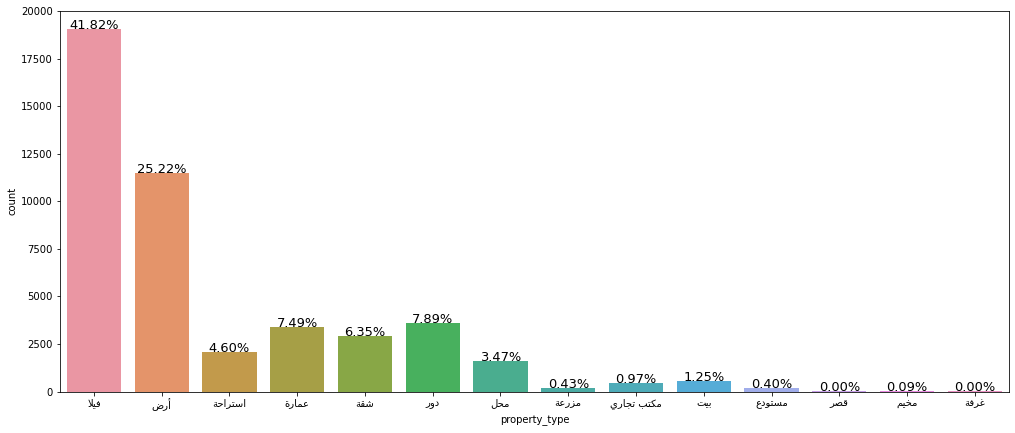

In [82]:
plt.figure(figsize=(17,7))
s = sns.countplot(x=single_close["property_type"], data=single_close,dodge=True)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(single_close)*100),
            ha="center", fontsize=13)
#plt.savefig('single_close.png', dpi=300, bbox_inches='tight')

## 3.20 Real estate sold to famliys, what is the percentage, is it for villas, land or what ?

In [83]:
data = pd.read_csv("train.csv")
data =  data[data.floor_num != -1] 
data =  data[data.age_less_than != -1]
data_close = data[data["closed"] == "مغلق"]

In [84]:
family_close = data_close[data_close["family_or_single"] == "عوائل"]

In [85]:
family_close["property_type"].value_counts()

شقة           13740
دور              56
عمارة            14
فيلا             13
بيت               3
أرض               2
استراحة           1
مكتب تجاري        1
Name: property_type, dtype: int64

In [86]:
property_type_value_count = family_close["property_type"].value_counts()
values = family_close["property_type"].value_counts().keys().tolist()
counts = family_close["property_type"].value_counts().tolist()
property_type_value_count = family_close["property_type"].value_counts(normalize=True).mul(100).round(3).astype(str) + '%'
property_type_value_count

شقة           99.349%
دور            0.405%
عمارة          0.101%
فيلا           0.094%
بيت            0.022%
أرض            0.014%
استراحة        0.007%
مكتب تجاري     0.007%
Name: property_type, dtype: object

In [87]:
family_close["property_type"] = family_close["property_type"].replace("فيلا", get_display(arabic_reshaper.reshape("فيلا")))
family_close["property_type"] = family_close["property_type"].replace("أرض", get_display(arabic_reshaper.reshape("أرض")))
family_close["property_type"] = family_close["property_type"].replace("شقة", get_display(arabic_reshaper.reshape("شقة")))
family_close["property_type"] = family_close["property_type"].replace("عمارة", get_display(arabic_reshaper.reshape("عمارة")))
family_close["property_type"] = family_close["property_type"].replace("استراحة", get_display(arabic_reshaper.reshape("استراحة")))
family_close["property_type"] = family_close["property_type"].replace("دور", get_display(arabic_reshaper.reshape("دور")))
family_close["property_type"] = family_close["property_type"].replace("بيت", get_display(arabic_reshaper.reshape("بيت")))
family_close["property_type"] = family_close["property_type"].replace("مكتب تجاري", get_display(arabic_reshaper.reshape("مكتب تجاري")))


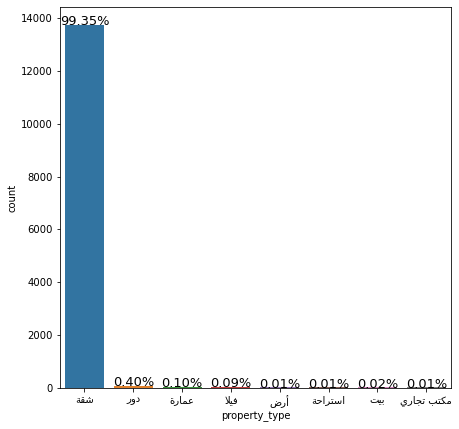

In [88]:
plt.figure(figsize=(7,7))
s = sns.countplot(x=family_close["property_type"], data=family_close,dodge=True)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(family_close)*100),
            ha="center", fontsize=13)
#plt.savefig('family_close.png', dpi=300, bbox_inches='tight')